In [8]:
import numpy as np
import pandas as pd
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import re
import os
import time
import csv
import os
import seaborn as sns

In [3]:
# Load the PMC database
df = pd.read_csv('./data/PMC-ids.csv',low_memory=False)

In [41]:
df.shape
df.head(10)


,Journal Title,ISSN,eISSN,Year,Volume,Issue,Page,DOI,PMCID,PMID,Manuscript Id,Release Date
4246167,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,652,NaN,PMC5093491,28907502.0,NaN,live
4246170,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,657,NaN,PMC5093494,28907504.0,NaN,live
4246169,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,512,NaN,PMC5093493,NaN,NaN,live
4246168,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,623,NaN,PMC5093492,28907503.0,NaN,live
4246166,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,M1,NaN,PMC5093490,28907501.0,NaN,live
4246165,J Psychol Med Ment Pathol,NaN,NaN,1848,1,1,128,NaN,PMC5093489,28907500.0,NaN,live
4246164,J Psychol Med Ment Pathol,NaN,NaN,1848,1,1,100,NaN,PMC5093488,28907499.0,NaN,live
4246162,J Psychol Med Ment Pathol,NaN,NaN,1848,1,1,iii,NaN,PMC5093485,NaN,NaN,live
4246160,J Psychol Med Ment Pathol,NaN,NaN,1848,1,1,169,NaN,PMC5093483,28907497.0,NaN,live
4246178,J Psychol Med Ment Pathol,NaN,NaN,1848,1,4,657,NaN,PMC5093502,NaN,NaN,live


In [19]:
# Check for articles that have a journal title and create a list of articles from neuro-psych-bio-medical fields
df_temp = df[~df['Journal Title'].isnull()]
j_list = ['brain', 'plos', 'neuro', 'psych', 'behav', 'cogn', 'bio', 'proc natl acad', 'elife',
          'nature', 'science', 'sci rep', 'nat ', 'front ']
df_keep = df_temp[df_temp['Journal Title'].str.lower().str.contains('|'.join(j_list))]

In [22]:
df_keep.shape


(2539141, 12)

In [23]:
df = df_keep.sort_values('Year')

In [44]:
df_small  = df_keep.iloc[-1000000:]
df_small.shape
df_small['Journal Title'].unique

<bound method Series.unique of 6024737                Sci Rep
6024736                Sci Rep
6024725                Sci Rep
6024726                Sci Rep
6024727                Sci Rep
                  ...         
8954258      Neuropharmacology
8954227             J Xenobiot
8954024        Front Neuroanat
8953953    Front Cell Dev Biol
8954138       J Funct Biomater
Name: Journal Title, Length: 1000000, dtype: object>

<AxesSubplot:xlabel='Year', ylabel='count'>

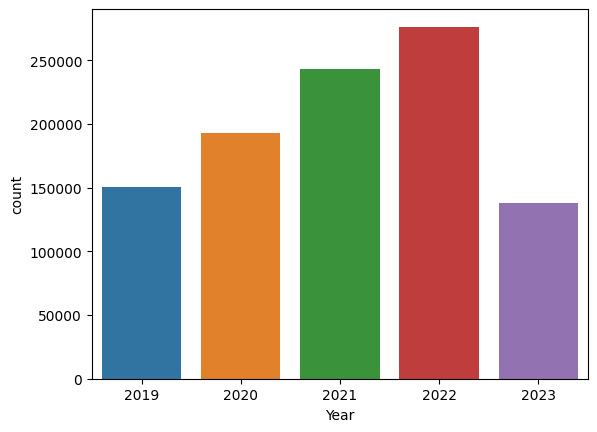

In [39]:
sns.countplot(data = df_small, x = 'Year') 

